In [1]:
# Set up imports
# %matplotlib ipympl
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

## Annealing Function

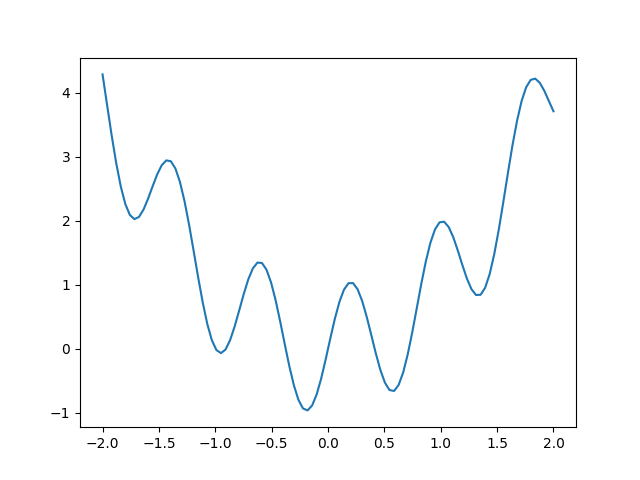

In [2]:
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
plt.plot(xbase, ybase)
plt.show()

Definition and plot of the function given in the presentation

(-0.1699668814326966, -0.9489203898513615)


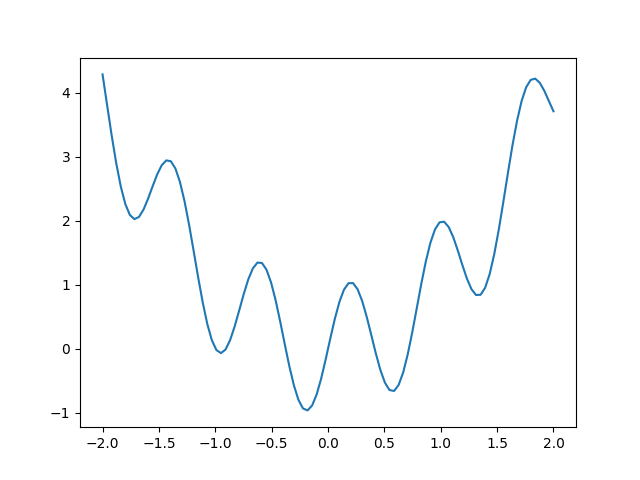

In [3]:
plt.close()
xa=[]
ya=[]
xg=[]
yg=[]

def annealing(f, s, t, l):
    # global xa, ya, xg, yg
    s=float(s)
    t=float(t)
    l=float(l)
    bestx=s
    bestcost=100000
    for i in range(100):
        dx = (np.random.random_sample() - 0.5) * t
        x = bestx + dx
        y=f(x)
        if y < bestcost:
            bestcost = y
            bestx = x
            
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/t):
                bestcost = y
                bestx = x
        xg.append(bestx)
        yg.append(bestcost)
        xa.append(x)
        ya.append(y)
        t = t * l
    return bestx, f(bestx)

fig, ax = plt.subplots()
ax.plot(xbase, ybase)
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
print(annealing(yfunc, -2, 3, 0.95))
xt=[]
yt=[]
def one_step(frame):
    # global frame
    lngood.set_data(xg[frame], yg[frame])
    xt.append(xa[frame])
    yt.append(ya[frame])
    lnall.set_data(xt, yt)
    
ani= FuncAnimation(fig, one_step, frames=range(100), interval=100, repeat=False)
plt.show()

Defined a function named annealing which takes a function f, starting point s, Temperature t, decay rate l as parameters and returns x and f(x) at the point where f(x) is minimum.This function also creates 4 lists xa, ya, xg, yg which are used to write the update function onestep for the animation.

## Traveling salesman Problem

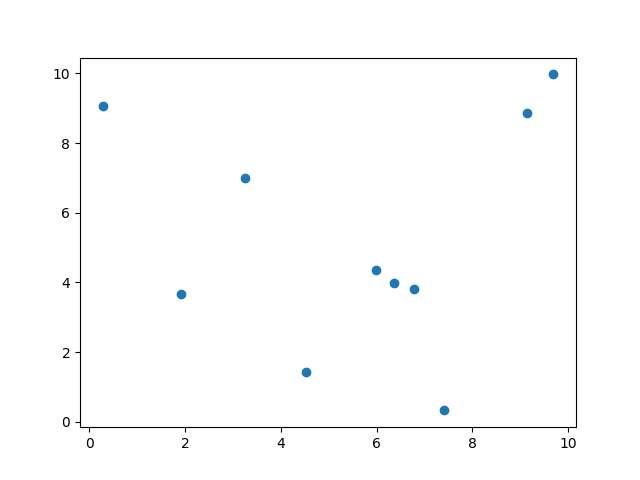

In [4]:
plt.close()
filename="tsp_10.txt"
with open(filename, "r") as file:
    data=file.readlines()
    n=int(data[0])
    x10=[]
    y10=[]
    for i in range(1,n+1):
        l=data[i].split()
        x10.append(float(l[0]))
        y10.append(float(l[1]))
plt.plot(x10,y10,"o")
plt.show()

Reading the 10 cities data and storing the points in x10 and y10. Also Ploted all 10 points

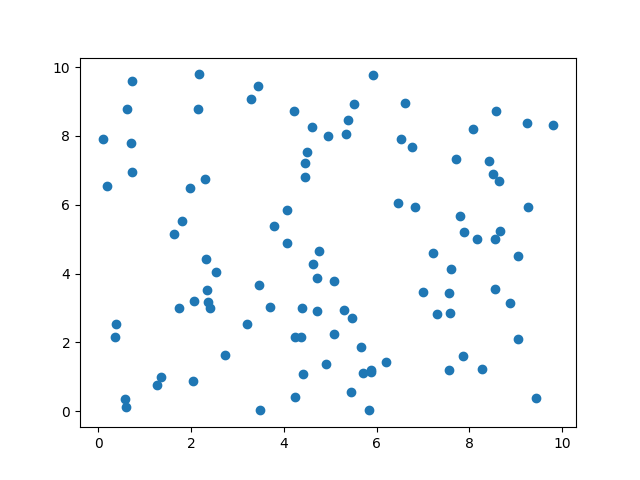

In [5]:
plt.close()
filename="tsp_100.txt"
with open(filename, "r") as file:
    data=file.readlines()
    n=int(data[0])
    x100=[]
    y100=[]
    for i in range(1,n+1):
        l=data[i].split()
        x100.append(float(l[0]))
        y100.append(float(l[1]))
plt.plot(x100,y100,"o")
plt.show()

Reading the 100 cities data and storing the points in x100 and y100. Also ploted all 100 points

[0, 6, 5, 4, 3, 2, 8, 1, 7, 9]
37.24243546658251


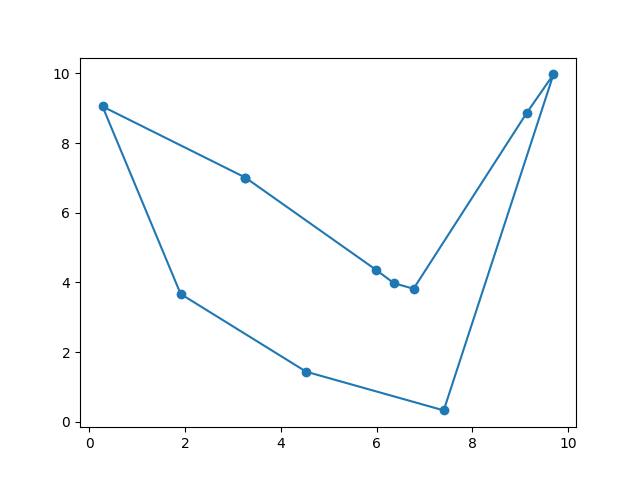

In [10]:
plt.close()
x1=x10
y1=y10
n1=len(x1)
bestdist1=0
bestorder1=[]

bestorder1.append(0)
for i in range(1,n1):
    bestorder1.append(i)
    bestdist1+=((x1[bestorder1[i]]-x1[bestorder1[i]-1])**2+(y1[bestorder1[i]]-y1[bestorder1[i]-1])**2)**0.5
bestdist1+=((x1[bestorder1[n1-1]]-x1[bestorder1[0]])**2+(y1[bestorder1[n1-1]]-y1[bestorder1[0]])**2)**0.5
    
T = 100.0
decayrate = 0.95

for i in range(100000):
    dist=0
    order=bestorder1[:]
    l=random.sample(range(1, n1-1), 2)
    r=l[0]
    p=l[1]
    order[r], order[p] = order[p], order[r]

    for i in range(1,n1):
        dist+=((x1[order[i]]-x1[order[i-1]])**2+(y1[order[i]]-y1[order[i-1]])**2)**0.5
    dist+=((x1[order[n1-1]]-x1[order[0]])**2+(y1[order[n1-1]]-y1[order[0]])**2)**0.5

    if dist < bestdist1:
        bestdist1 = dist
        bestorder1=order[:]
        
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(dist-bestdist1)/T):
            bestdist1 = dist
            bestorder1=order[:]

    T=T*decayrate

print(bestorder1)
print(bestdist1)

x_cities=np.array(x1)
y_cities=np.array(y1)
xplot = x_cities[bestorder1] 
yplot = y_cities[bestorder1]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

* Using Annealing to find the minimum distance in the travelling salesman problem.
* Initially took the order of points given in the dataset as the path the salesman travlles and then kept swapping poisitions of two points in the path many no.of times so that we get a reasonably low value of the distance.
* For 10 cities best path in which the salesman covers smallest distance is [0, 6, 5, 4, 3, 2, 8, 1, 7, 9] and the shortest distance is 37.24243546658251

[0, 88, 17, 73, 29, 59, 97, 55, 31, 53, 90, 71, 54, 3, 22, 21, 6, 76, 16, 4, 89, 10, 85, 60, 38, 57, 12, 72, 45, 56, 47, 87, 92, 24, 94, 26, 69, 43, 11, 37, 81, 44, 1, 70, 9, 66, 20, 77, 41, 34, 39, 19, 30, 15, 50, 42, 63, 95, 52, 65, 93, 14, 27, 36, 80, 18, 7, 61, 74, 40, 8, 78, 67, 35, 83, 91, 28, 64, 96, 79, 32, 33, 82, 46, 62, 98, 23, 2, 5, 13, 58, 75, 48, 49, 51, 68, 84, 86, 25, 99]
125.40320731245828


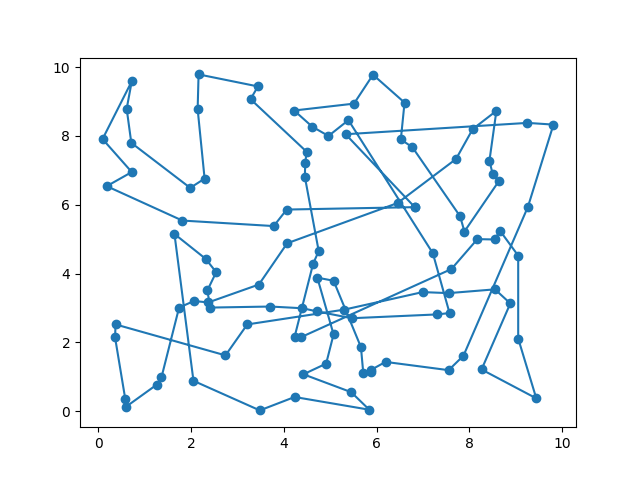

In [22]:
plt.close()
x2=x100
y2=y100
n2=len(x2)
bestdist2=0
bestorder2=[]

bestorder2.append(0)
for i in range(1,n2):
    bestorder2.append(i)
    bestdist2+=((x2[bestorder2[i]]-x2[bestorder2[i]-1])**2+(y2[bestorder2[i]]-y2[bestorder2[i]-1])**2)**0.5
bestdist2+=((x2[bestorder2[n2-1]]-x2[bestorder2[0]])**2+(y2[bestorder2[n2-1]]-y2[bestorder2[0]])**2)**0.5
    
T = 100.0
decayrate = 0.95

for i in range(100000):
    dist=0
    order=bestorder2[:]
    l=random.sample(range(1, n2-1), 2)
    r=l[0]
    p=l[1]
    order[r], order[p] = order[p], order[r]

    for i in range(1,n2):
        dist+=((x2[order[i]]-x2[order[i-1]])**2+(y2[order[i]]-y2[order[i-1]])**2)**0.5
    dist+=((x2[order[n2-1]]-x2[order[0]])**2+(y2[order[n2-1]]-y2[order[0]])**2)**0.5

    if dist < bestdist2:
        bestdist2 = dist
        bestorder2=order[:]
        
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(dist-bestdist2)/T):
            bestdist2 = dist
            bestorder2=order[:]

    T=T*decayrate

print(bestorder2)
print(bestdist2)

x_cities=np.array(x2)
y_cities=np.array(y2)
xplot = x_cities[bestorder2] 
yplot = y_cities[bestorder2]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

* Similarly for the 100 cities dataset
* For 100 cities best path in which the salesman covers smallest distance is [0, 88, 17, 73, 29, 59, 97, 55, 31, 53, 90, 71, 54, 3, 22, 21, 6, 76, 16, 4, 89, 10, 85, 60, 38, 57, 12, 72, 45, 56, 47, 87, 92, 24, 94, 26, 69, 43, 11, 37, 81, 44, 1, 70, 9, 66, 20, 77, 41, 34, 39, 19, 30, 15, 50, 42, 63, 95, 52, 65, 93, 14, 27, 36, 80, 18, 7, 61, 74, 40, 8, 78, 67, 35, 83, 91, 28, 64, 96, 79, 32, 33, 82, 46, 62, 98, 23, 2, 5, 13, 58, 75, 48, 49, 51, 68, 84, 86, 25, 99] and the shortest distance is 125.40320731245828